In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

# Transformation der DGL:
Zunächst übersetzen wir die DGL in ein gekoppelte DGL erster Ordnung:
\begin{equation}
    \dot x(t) = u (t), \quad \ddot x(t) = \dot v (t) = - \omega_0^2 u(t) - 2 \beta v (t)
\end{equation}
Die DGL ergibt sich dann durch:
\begin{equation}
    \frac{d}{dt} \begin{pmatrix}  u (t) \\ v(t) \end{pmatrix} = \begin{pmatrix}
    0 & 1 \\
    - \omega_0^2 & - 2 \beta
\end{pmatrix}\begin{pmatrix}
    u(t) \\
    v (t)
\end{pmatrix}
\end{equation}
Wir schreiben ferner:
\begin{equation}
    M = \begin{pmatrix}
    0 & 1 \\
    - \omega_0^2 & - 2 \beta
\end{pmatrix}
\end{equation}
und somit:
\begin{equation}
    \frac{d}{dt} \begin{pmatrix}  u (t) \\ v(t) \end{pmatrix} = M \begin{pmatrix}
    u(t) \\
    v (t)
\end{pmatrix}
\end{equation}

In [24]:
def dgl(t, y, M):
    return np.dot(M, y).flatten()


def solve_DGL(omega, beta, alpha_1, alpha_2):
    M = np.array([[0, 1], [-omega**2, - 2* beta]])
    y_0 = np.array([alpha_1, alpha_2])
    return solve_ivp(dgl, [0, 20], y_0, method='LSODA', args=(M, ), dense_output=True)

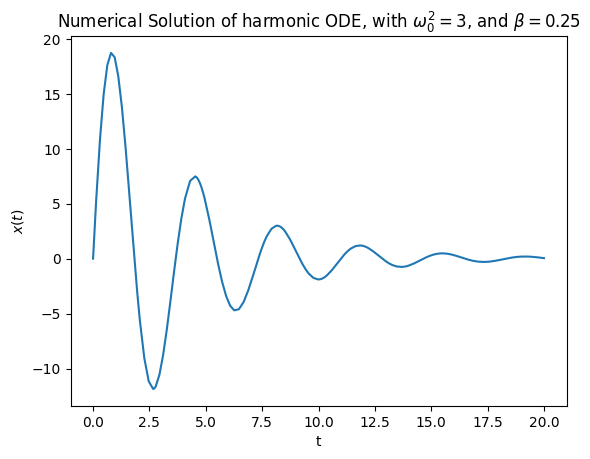

In [26]:
solution = solve_DGL(np.sqrt(3), 0.25, 0, 40)
plt.plot(solution.t, solution.y[0])
plt.title(r'Numerical Solution of harmonic ODE, with $\omega_0^2 = 3$, and $\beta = 0.25$')
plt.ylabel("$x(t)$")
plt.xlabel("t")
plt.show()